In [12]:
%matplotlib inline

In [13]:
# %load image_loader.py
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import resize
import os

def open_images(path):
    train_images = imread(path)
    gray_image = rgb2gray(train_images) #for making image gray scale
    # color_size = resize(train_images, (50, 50))    
    gray_size = resize(gray_image, (32, 32))
    gray_ravel = gray_size.ravel()
    
    return gray_ravel

# get_file_names and get_jpgs was part of my EDA   
def get_file_names(dir_name):
    # create a list of file and sub directories 
    # names in the given directory 
    list_of_file = os.listdir(dir_name)
    all_files = []
    # Iterate over all the entries
    for entry in list_of_file:
        # Create full path
        full_path = os.path.join(dir_name, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(full_path):
            all_files = all_files + get_file_names(full_path)
        else:
            all_files.append(full_path)
    return all_files

def get_jpgs(t_set):
    images_array = []
    for path in t_set:
        if path[-3:] == 'jpg':
            images_array.append(open_images(path))
    return images_array


if __name__ == '__main__':     
    ## functions currently have grayscale active. see gray_image variable
    training_img = open_images('../data/Train/Salak/0_100.jpg')
    # print(training_img, '\n')
    testing_img = open_images('../data/Test/Mango/0_100.jpg')
    # print(testing_img, '\n')

    ## returns all_files in path
    # training_set = get_file_names('data/Train')
    # testing_set = get_file_names('data/Test')

    ## returns all .jpg files
    # jpgs = get_jpgs(training_set)
    # jpgs = get_jpgs(testing_set)
    

In [14]:
# %load ../src/naive_bayes_fv.py
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, KFold
import glob
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
                            multilabel_confusion_matrix, balanced_accuracy_score, classification_report)
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

def get_X_y_fv():
    X = []
    y = []   
    y_enumerated = []                   
    data_folders = ['Train', 'Test']
    lych_rasp = os.listdir('../data/Train')[3:34:30]
            
    for folder in data_folders:

        for idx, fruits in enumerate(lych_rasp):
            path = glob.glob('../data/{}/{}/*.jpg'.format(folder, fruits))
            label = fruits
            
            for p in path:
                X.append(open_images(p))
                y.append(label)
                y_enumerated.append(idx)
            
    X = np.asarray(X)
    # print(len(X), '\n')
    # print('*********************************************\n')
    y = np.asarray(y)
    # print(len(y))
#     print(path, 'path***********\n')
#     print(X, 'X**********\n')
#     print(y, 'y**********\n')
#     print(y_enumerated, 'y_enumerated*********\n')
#     print(lych_rasp, 'lych_rasp**********\n')
    return X, y, y_enumerated, lych_rasp

# def crossVal(k, threshold=0.50): # does not work with pca due to negatives
#     X, y = get_X_y_fv()[:2] #call from principal_component_analysis()?

#     kf = KFold(n_splits=k)
#     train_accuracy = []
#     test_accuracy = []
   
#     for train, test in kf.split(X):
#         # Split into train and test
#         X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
#         # Fit estimator
#         model = MultinomialNB()
#         model.fit(X_train, y_train)
#         # Measure performance
#         y_hat_trainprob = model.predict_proba(X_train)[:,1]
#         y_hat_testprob = model.predict_proba(X_test)[:,1]
#         y_hat_train = (y_hat_trainprob >= threshold).astype(int)
#         y_hat_test = (y_hat_testprob >= threshold).astype(int)
#         # metrics
#         train_accuracy.append(accuracy_score(y_train, y_hat_train))
#         test_accuracy.append(accuracy_score(y_test, y_hat_test))
#     return np.mean(train_accuracy), np.mean(test_accuracy)

# def roc_you_curve(n_classes): # does not work with pca due to negatives, multiclass L-75
#     X, y = get_X_y_fv()[:2]  

#     # model = MultinomialNB()
    
#     X_train, X_test, y_train, y_test = train_test_split(X,y)
#     # model.fit(X_train, y_train)
#     # y_pred = model.predict(X_test) 
    
#     fpr = {}
#     tpr = {}
#     thresholds = {}

#     for i in range(n_classes): # try this for multiclass - IndexError: too many indices for array
#         fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i])        

#     # fpr, tpr, thresholds = roc_curve(y_test, y_pred) # not working due to multiclass.

#     # x = np.linspace(0,1, 100)
#     # _, ax = plt.subplots(1, figsize=(10,6))
#     # ax.plot(fpr, tpr, color='firebrick')
#     # ax.plot(x, x, linestyle='--', color ='black', label='Random Guess')
#     # ax.set_xlabel('False Positive Rate (FPR)', fontsize=16)
#     # ax.set_ylabel('True Positive Rate (TPR)', fontsize=16)
#     # ax.set_title('ROC Curve for Random Forest')
#     # plt.legend()
#     # plt.show()
#     # plt.savefig('../images/roccurve.png',  bbox_inches='tight')

#     return fpr, tpr, thresholds

# def non_negative_matrix_factorization():
#     X = get_X_y_fv()[0]
#     model = NMF()
#     W = model.fit_transform(X)
#     H = model.components_

#     return W, H

def naive_bayes():
    X, y, _, lych_rasp = get_X_y_fv()

    X_train, X_test, y_train, y_test = train_test_split(X, y)    
    
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # acc = accuracy_score(y_test, y_pred)
    # recall = recall_score(y_test, y_pred, labels=lych_rasp, average=None)
    # prec = precision_score(y_test, y_pred, labels=lych_rasp, average=None)
    # fone = f1_score(y_test, y_pred, labels=lych_rasp, average=None)
    mult_con_matrix = multilabel_confusion_matrix(y_test, y_pred, labels=lych_rasp)
    # bal_acc_scor = balanced_accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=3)

    return mult_con_matrix, report
    
if __name__ == '__main__':
    get_it = get_X_y_fv()
    
    # cross = crossVal(5)

    # roc = roc_you_curve(len(get_it[2][:10])) # not working due to multiclass, can't use pca
                                               # due to negative values, 
                                               # IndexError: too many indices for array

    # nnmf = non_negative_matris_factorization()
    # print(nnmf)
 
    # naiveb_model = naive_bayes() # does not run due to negative values from pca, use get_it
    # print(naiveb_model)

In [15]:
pwd

'/home/leonardo-leads/Documents/galvanize_dsi/Fruits_Veggies_Nutr_Facts/notebooks'


# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


Automatically created module for IPython interactive environment
(67456,) #############
(67456,) *********
(67456,) *********
(67456,) #############
(67456,) #############
(67456,) #############
(67456,) #############
(67456,) *********
(67456,) #############
(67456,) *********
(66443,) #############
(66443,) *********
(66443,) *********
(66443,) #############
(66443,) #############
(66443,) #############
(66443,) #############
(66443,) *********
(66443,) #############
(66443,) *********


ValueError: query data dimension must match training data dimension

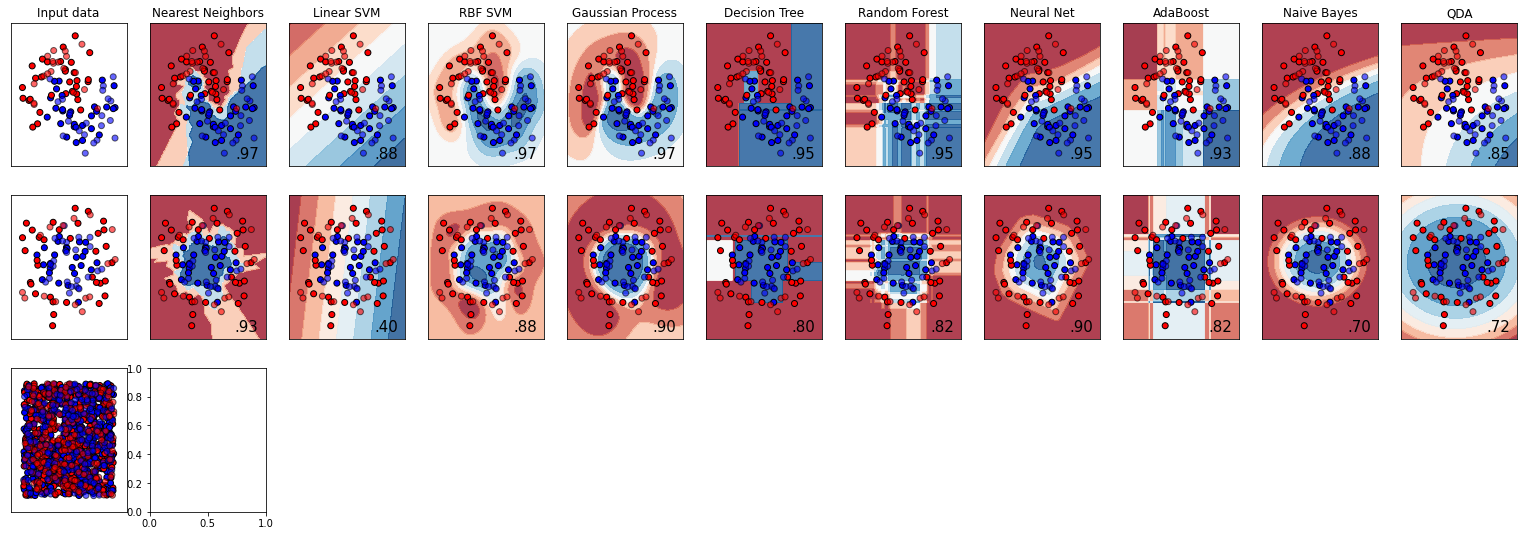

In [32]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y_enumerated = get_X_y_fv()[0:4:2]
# print(X)
# print(y_enumerated)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y_enumerated)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
# print(datasets[0], '*******\n', datasets[1], '************\n', datasets[2][0], '********\n',
      # datasets[2][1], '**********\n')        

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            print(Z.shape, '*********')
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            print(Z.shape, '#############')
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()